## Técnicas de Programação I - Numpy

Na aula de hoje iremos explorar os seguintes tópicos:

- Numpy


### Numpy

Numpy é uma das principais bibliotecas do Python, devido a sua grande velocidade e eficiência ele é extremamente utilizada para computação científica e analise de dados. Esta fama se da principalmente a estrutura chamada [numpy array](https://docs.scipy.org/doc/numpy/reference/arrays.html), uma forma **eficiente** de **guardar e manipular matrizes**, que serve como base para as tabelas que iremos utilizar.

#### Intalação

Para instalar o numpy podemos utilizar os seguintes comandos:

`conda install numpy`, caso queira instalar utilizando o [conda](https://www.anaconda.com/products/distribution)

`pip install numpy`, ou utilizando o gerenciador de pacotes Pip.

In [1]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando o módulo numpy
# Por conveniência utilizamos o `as` dando um "apelido" (alias) para o módulo
# Neste caso sendo `np`
import numpy as np

#### Criando listas/vetores/arrays

In [3]:
# Criando uma lista em Python
lista = [2, 3, 4, 20, 31, 7]
print('lista', type(lista), lista)

lista <class 'list'> [2, 3, 4, 20, 31, 7]


In [4]:
vetor_numpy = np.array(lista)
print('vetor_numpy', type(vetor_numpy), vetor_numpy)

vetor_numpy <class 'numpy.ndarray'> [ 2  3  4 20 31  7]


In [5]:
# Podemos criar objetos mais complexos, como matrizes multidimensionais
lista_de_lista = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]
bi_matrix = np.array(lista_de_lista)
print('bi_matrix', type(bi_matrix))
print(bi_matrix)

bi_matrix <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
# Matrizes com mais dimensões
red = [
    [0, 22, 32],
    [0, 45, 61],
    [0, 0, 0],
]
green = [
    [10, 27, 37],
    [12, 45, 61],
    [120, 10, 120],
]
blue = [
    [15, 45, 78],
    [10, 22, 64],
    [20, 20, 22],
]

rgb = np.asarray([red, green, blue])
print(type(rgb))
print(rgb)

<class 'numpy.ndarray'>
[[[  0  22  32]
  [  0  45  61]
  [  0   0   0]]

 [[ 10  27  37]
  [ 12  45  61]
  [120  10 120]]

 [[ 15  45  78]
  [ 10  22  64]
  [ 20  20  22]]]


**Note o tipo do objeto, no caso do numpy ele é um ndarray (n-dimensional array)**



#### Propriedades de arrays

In [7]:
vetor_numpy = np.array([1, 2, 3, 4, 5])
print('Vetor ndim', vetor_numpy.ndim)    # Unidimensional
print('Vetor shape', vetor_numpy.shape)  # 5 elementos
print('Vetor size', vetor_numpy.size)    # Número de elementos totais
print('-' * 32)

print('Matriz bidimensional ndim', bi_matrix.ndim)    # Bidimensional
print('Matriz bidimensional shape', bi_matrix.shape)  # (3, 3) elementos (Linha/Coluna)
print('Matriz bidimensional size', bi_matrix.size)    # Número de elementos totais
print('-' * 32)

print('Matriz tridimensional ndim', rgb.ndim)    # Tridimensional
print('Matriz tridimensional shape', rgb.shape)  # (3, 3, 3) elementos (Canais/Linha/Coluna)
print('Matriz tridimensional size', rgb.size)    # Número de elementos totais
print('-' * 32)

Vetor ndim 1
Vetor shape (5,)
Vetor size 5
--------------------------------
Matriz bidimensional ndim 2
Matriz bidimensional shape (3, 3)
Matriz bidimensional size 9
--------------------------------
Matriz tridimensional ndim 3
Matriz tridimensional shape (3, 3, 3)
Matriz tridimensional size 27
--------------------------------


Numpy arrays possuem um tamanho fixo na sua criação, ou seja, diferente das listas (que podem crescer dinamicamente). Ao modificar o tamanho do `ndarray` um novo array será criado e o array original será deletado.

**Cuidado com objetos mutáveis em Python (listas e arrays)!**

Há dois comportamentos, shalow copy e deep copy

Para saber mais temos [esse artigo](https://realpython.com/copying-python-objects/#:~:text=A%20shallow%20copy%20means%20constructing,of%20the%20child%20objects%20themselves.)

In [8]:
ds = ["Python", "SQL", 'R']
web = ["HTML", "CSS", 'JavaScript']

# Concatenando as listas com `+`
linguagens_mais = ds + web

print(f'''
Utilizando o operador "+"
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_mais: [id:{id(linguagens_mais)}]: {linguagens_mais}
''')

# Extendendo as listas com `extend`
linguagens_extend = ds
print(f'''
Antes de utilizar o extend
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_extend: [id:{id(linguagens_extend)}]: {linguagens_extend}
''')

linguagens_extend.extend(web)

print(f'''
Após utilizar o extend
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_extend: [id:{id(linguagens_extend)}]: {linguagens_extend}
''')


Utilizando o operador "+"
ds: [id:140416588915648]: ['Python', 'SQL', 'R']
web: [id:140416658688752]: ['HTML', 'CSS', 'JavaScript']
linguagens_mais: [id:140416588915808]: ['Python', 'SQL', 'R', 'HTML', 'CSS', 'JavaScript']


Antes de utilizar o extend
ds: [id:140416588915648]: ['Python', 'SQL', 'R']
web: [id:140416658688752]: ['HTML', 'CSS', 'JavaScript']
linguagens_extend: [id:140416588915648]: ['Python', 'SQL', 'R']


Após utilizar o extend
ds: [id:140416588915648]: ['Python', 'SQL', 'R', 'HTML', 'CSS', 'JavaScript']
web: [id:140416658688752]: ['HTML', 'CSS', 'JavaScript']
linguagens_extend: [id:140416588915648]: ['Python', 'SQL', 'R', 'HTML', 'CSS', 'JavaScript']



**No exemplo acima, ao utilizar o extend houve a mudança da lista original `ds`**

Para evitar esse comportamento precisamos alterar o endereço de memória, ou seja, realizar uma cópia profunda!

Para ser seguro utilizamos o `deepcopy`

In [9]:
from copy import deepcopy

ds = ["Python", "SQL", 'R']
web = ["HTML", "CSS", 'JavaScript']

# Concatenando as listas com `+`
linguagens_mais = ds + web

print(f'''
Utilizando o operador "+"
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_mais: [id:{id(linguagens_mais)}]: {linguagens_mais}
''')

# Extendendo as listas com `extend`
linguagens_extend = deepcopy(ds)
print(f'''
Antes de utilizar o extend
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_extend: [id:{id(linguagens_extend)}]: {linguagens_extend}
''')

linguagens_extend.extend(web)

print(f'''
Após utilizar o extend
ds: [id:{id(ds)}]: {ds}
web: [id:{id(web)}]: {web}
linguagens_extend: [id:{id(linguagens_extend)}]: {linguagens_extend}
''')


Utilizando o operador "+"
ds: [id:140416588909056]: ['Python', 'SQL', 'R']
web: [id:140416658704336]: ['HTML', 'CSS', 'JavaScript']
linguagens_mais: [id:140416658650688]: ['Python', 'SQL', 'R', 'HTML', 'CSS', 'JavaScript']


Antes de utilizar o extend
ds: [id:140416588909056]: ['Python', 'SQL', 'R']
web: [id:140416658704336]: ['HTML', 'CSS', 'JavaScript']
linguagens_extend: [id:140416658721680]: ['Python', 'SQL', 'R']


Após utilizar o extend
ds: [id:140416588909056]: ['Python', 'SQL', 'R']
web: [id:140416658704336]: ['HTML', 'CSS', 'JavaScript']
linguagens_extend: [id:140416658721680]: ['Python', 'SQL', 'R', 'HTML', 'CSS', 'JavaScript']



Qual utilizamos o id, retornamos o id único do objeto. Podemos pensar como sendo o endereço de memória do objeto!

Por curiosidade, para economizar memória o Python muitas vezes aloca valores iguais no mesmo endereço de memória, por este motivo ocorreu o comportamento inesperado com a lista!

O mesmo ocorre com valores númericos, como no exemplo abaixo

In [10]:
var1 = 10
var2 = 10
print(var1 == var2)
# Com valores númericos o id é o mesmo (mesmo endereço de memória)
print(id(var1) == id(var2))

True
True


**No caso de ndarrays temos o mesmo efeito que as listas!**

In [11]:
# Criando um array
arr1 = np.array([1, 2, 3])
arr2 = arr1
print(f'arr1 <id {id(arr1)}>, {arr1}')
print(f'arr2 <id {id(arr2)}>, {arr2}')

arr1 <id 140416588962288>, [1 2 3]
arr2 <id 140416588962288>, [1 2 3]


Nesse caso se alterarmos o arr1 um valor do `arr1`, o `arr2` será alterado?

In [12]:
arr1[0] = 10
print(f'arr1 <id {id(arr1)}>, {arr1}')
print(f'arr2 <id {id(arr2)}>, {arr2}')

arr1 <id 140416588962288>, [10  2  3]
arr2 <id 140416588962288>, [10  2  3]


Para evitar podemos utilizar o `deepcopy` ou o método `copy` de arrays.

Note que o deepcopy sempre é o mais seguro!

In [13]:
arr1 = np.array([1, 2, 3])
arr2 = arr1.copy() # ou deepcopy(arr1)
print(f'arr1 <id {id(arr1)}>, {arr1}')
print(f'arr2 <id {id(arr2)}>, {arr2}')

arr1[0] = 10
print(f'arr1 <id {id(arr1)}>, {arr1}')
print(f'arr2 <id {id(arr2)}>, {arr2}')

arr1 <id 140416588952560>, [1 2 3]
arr2 <id 140416588952272>, [1 2 3]
arr1 <id 140416588952560>, [10  2  3]
arr2 <id 140416588952272>, [1 2 3]


### Criando vetores de zeros

In [14]:
n = 10
lista_zeros = [0] * n
print(f'lista_zeros, tamanho {len(lista_zeros)}, {lista_zeros}')

lista_zeros, tamanho 10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# Utilizando o numpy
zeros = np.zeros(n)
print(f'zeros, tamanho {len(zeros)}, {zeros}')

zeros, tamanho 10, [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Criando vetores de uns

In [16]:
uns = np.ones(n)
print(f'uns, tamanho {len(uns)}, {uns}')

uns, tamanho 10, [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##### **DROPS**

Escreva um programa que crie um array de tamanho 100 e atualize os indices pares com o número do indice ao quadrado

Por exemplo:

`array(0, 0, 1, 0, 4, 0, 16, ...)`

Explicação
```
0 -> 0**2  -> 0
1 -> impar -> 0
2 -> 2**2  -> 4
3 -> impar -> 0
4 -> 4**2  -> 16
```

In [17]:
arr = np.zeros(100)
# np.set_printoptions(suppress=True)  # Suprimindo a anotação científica, suppress=True!
for idx, valor in enumerate(arr):
  if idx % 2 == 0:
    arr[idx] = idx**2
  else:
    arr[idx] = 0
print(arr)

[0.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 0.000e+00 3.600e+01
 0.000e+00 6.400e+01 0.000e+00 1.000e+02 0.000e+00 1.440e+02 0.000e+00
 1.960e+02 0.000e+00 2.560e+02 0.000e+00 3.240e+02 0.000e+00 4.000e+02
 0.000e+00 4.840e+02 0.000e+00 5.760e+02 0.000e+00 6.760e+02 0.000e+00
 7.840e+02 0.000e+00 9.000e+02 0.000e+00 1.024e+03 0.000e+00 1.156e+03
 0.000e+00 1.296e+03 0.000e+00 1.444e+03 0.000e+00 1.600e+03 0.000e+00
 1.764e+03 0.000e+00 1.936e+03 0.000e+00 2.116e+03 0.000e+00 2.304e+03
 0.000e+00 2.500e+03 0.000e+00 2.704e+03 0.000e+00 2.916e+03 0.000e+00
 3.136e+03 0.000e+00 3.364e+03 0.000e+00 3.600e+03 0.000e+00 3.844e+03
 0.000e+00 4.096e+03 0.000e+00 4.356e+03 0.000e+00 4.624e+03 0.000e+00
 4.900e+03 0.000e+00 5.184e+03 0.000e+00 5.476e+03 0.000e+00 5.776e+03
 0.000e+00 6.084e+03 0.000e+00 6.400e+03 0.000e+00 6.724e+03 0.000e+00
 7.056e+03 0.000e+00 7.396e+03 0.000e+00 7.744e+03 0.000e+00 8.100e+03
 0.000e+00 8.464e+03 0.000e+00 8.836e+03 0.000e+00 9.216e+03 0.000e+00
 9.604

#### Criando ranges de números

In [18]:
# Da forma que já aprendemos
# inicio 0, fim 9 e passo 2
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [19]:
# Utilizando o numpy
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

#### **Drops**

Escreva um programa que crie um array com números variando de 12 a 37

Por exemplo:

```
[12, 13, 14, ..., 37]
```

In [20]:
array = np.arange(12, 38)
type(array), array

(numpy.ndarray,
 array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37]))

In [21]:
# No `arange` o numpy consegue gerar números `float`
# diferente do range que retorna apenas números inteiros
np.arange(0, 3, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [22]:
# Conseguimos gerar números num espaço linear
n = 21
lista = [x / (n - 1) for x in range(0, n)]
print('lista', 'tamanho', len(lista))
lista

lista tamanho 21


[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [23]:
# Com numpy utilizamos a função `linspace`
arr_linspace = np.linspace(0, 1, 21)
arr_linspace

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [24]:
# Número negativos até positivos
np.linspace(-1, 1, 21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [25]:
np.linspace(0, 1, 101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

#### Gerando números aleatórios

In [26]:
import random
# Gerando um número aleatório entre 0 e 99
print('Número', random.randint(0, 100))
type(random.randint(0, 100))

Número 93


int

In [27]:
# Utilizando o numpy
print('Número <np>', np.random.randint(0, 100))
type(np.random.randint(0, 100))

Número <np> 62


int

In [28]:
# Gerando 10 números aleatórios utilizando o Python puro
[random.randint(0, 100) for n in range(0, 10)]

[28, 44, 49, 6, 34, 40, 7, 77, 40, 60]

In [29]:
# Gerando 10 inteiros aleatórios
np.random.randint(0, 100, 10)

array([ 4, 56, 52, 35, 16, 81, 23, 78, 48,  1])

In [30]:
%%time
# Tempo para gerar 5 milhões de números aleatórios Python puro
_ = [random.randint(0, 100) for n in range(0, 5_000_000)]

CPU times: user 10.3 s, sys: 202 ms, total: 10.5 s
Wall time: 15 s


In [31]:
%%time
# Tempo para gerar 5 milhões de números aleatórios utilizando numpy
_ = np.random.randint(0, 100, 5_000_000)

CPU times: user 75.1 ms, sys: 12.8 ms, total: 87.9 ms
Wall time: 187 ms


**Drops**

Crie um array aleatório de 10.000 elementos de cada distribuição:
- [Normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#) (média: 5, desvio: 10)
- [Poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) (use lam (lambda) de 5)
- [Exponencial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) (use scale: 5)

Casos de uso:
- Normal
  - Altura
  - Jogar um dado
  - Preço de ações
- Poisson
  - Número de clientes numa fila em um determinado tempo (uma hora por exemplo)
  - Número de inadiplências por mês
  - Venda de um item por mês
- Exponencial
  - Predizer quando um terremoto irá acontecer
  - Duração de uma ligação
  - Vendas esperadas ao abrir uma nova loja


In [32]:
# Distribuição normal utilizando Numpy
normal = np.random.normal(5, 10, 300_000)

# Distribuição de Poisson
# média = lambda e o desvio padrão = lambda
poisson = np.random.poisson(5, 300_000)

# Distribuição exponencial
exponential = np.random.exponential(5, 300_000)

# Distribuição weibull
weibull = np.random.weibull(5, 300_000)

print('normal', 'tamanho', normal.shape)
print(normal)
print('poisson', 'tamanho', poisson.shape)
print(poisson)
print('exponential', 'tamanho', exponential.shape)
print(exponential)

normal tamanho (300000,)
[-7.22014418 -1.83431938 14.55143971 ... 22.87442772 -6.58564087
 -5.42168913]
poisson tamanho (300000,)
[5 5 6 ... 0 5 6]
exponential tamanho (300000,)
[ 0.02602451  2.08498836 10.17293984 ...  0.81738745  4.70854669
  3.01878086]


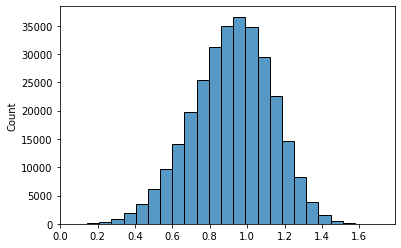

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.histplot(normal, bins=30)
# sns.histplot(poisson, bins=19, color ='orange')
# sns.histplot(exponential, bins=25, color='red')
sns.histplot(weibull, bins=25, color=sns.color_palette()[0]) # sns.color_palette()[0] -> Azul


#### Manipulando o formato de ndarrays
Podemos criar arrays multidimensionais de diversas formas

In [34]:
# Matriz 3x3 de zeros
matrix_3x3 = np.zeros((3, 3))
print('Shape', matrix_3x3.shape)
print(matrix_3x3)

matriz_2x3x3 = np.zeros((2, 3, 3))
print('Shape', matriz_2x3x3.shape)
print(matriz_2x3x3)

Shape (3, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Shape (2, 3, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [35]:
vetor = np.arange(0, 12)
print(f'vetor, shape {vetor.shape}, {vetor}')

# Redimensionar a matriz utilizando o reshape
matriz_3x4 = vetor.reshape(3, 4)
print(f'matriz_3x4, shape {matriz_3x4.shape}')
print(matriz_3x4)

vetor, shape (12,), [ 0  1  2  3  4  5  6  7  8  9 10 11]
matriz_3x4, shape (3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [36]:
# Ou podemos ilimitar uma dimensão
# Queremos 3 colunas
matriz_nx3 = vetor.reshape(-1, 3)
print(f'matriz_nx3, shape {matriz_nx3.shape}')
print(matriz_nx3)

matriz_nx3, shape (4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [37]:
# Empilhando arrays
v1 = np.array([1, 2, 3])
v2 = np.array([40, 50, 60])
m1 = np.array([
    [7, 8, 9],
    [10, 11, 12],
])

m2 = np.zeros((2, 2))
# Empilhamento vertical
print(f"v1, shape {v1.shape}, {v1}")
print(f"v2, shape {v2.shape}, {v2}")
print(f"m1, shape {m1.shape}, {m1}")
print(f"m2, shape {m2.shape}, {m2}")

v1_v2 = np.vstack([v1, v2])
print(f"v1_v2, shape {v1_v2.shape}")
print(v1_v2)

v1, shape (3,), [1 2 3]
v2, shape (3,), [40 50 60]
m1, shape (2, 3), [[ 7  8  9]
 [10 11 12]]
m2, shape (2, 2), [[0. 0.]
 [0. 0.]]
v1_v2, shape (2, 3)
[[ 1  2  3]
 [40 50 60]]


In [38]:
# Empilhamento horizontal
np.hstack([m1, m2])

array([[ 7.,  8.,  9.,  0.,  0.],
       [10., 11., 12.,  0.,  0.]])

In [39]:
# Tentando empilhar de forma horizontal
# A matriz `m1`(2 linhas) com `v1`(1 linha)
# Ocorre um erro! Precisamos ter o mesmo número de linhas
np.hstack([m1, v1])

ValueError: ignored

In [40]:
# Tentando empilhar de forma Vertical
# A matriz `m1`(3 colunas) com `m2`(2 colunas)
# Ocorre um erro! Precisamos ter o mesmo número de colunas
np.vstack([m1, m2])

ValueError: ignored

#### Indexação


In [41]:
arr1 = np.random.randint(0, 100, 10_000)
arr1

array([ 7, 68, 37, ..., 66, 63, 91])

In [42]:
print('Primeiro elemento', arr1[0])
print('12 elemento', arr1[11])

Primeiro elemento 7
12 elemento 46


In [43]:
# Conseguimos fatiar o array (slice) semelhante a listas
print('Pegando os quatro primeiros elementos', arr1[: 4], 'tamanho', len(arr1[: 4]))
print('Pegando os elementos internos', arr1[900: 8500], 'tamanho', len(arr1[900: 8500]))

Pegando os quatro primeiros elementos [ 7 68 37 74] tamanho 4
Pegando os elementos internos [ 3 12 75 ... 18  5 24] tamanho 7600


In [44]:
mat = np.random.randint(0, 100, (3, 4))
mat

array([[80, 67, 50, 74],
       [48, 19, 20, 49],
       [52, 14, 89, 30]])

In [45]:
print('Shape', mat.shape)

Shape (3, 4)


In [46]:
lista = list(mat)
col = []
for linha in lista:
  col.append(linha[0])

print(col)

[80, 48, 52]


In [47]:
# Pegando a primeira linha
print(mat[0])
print('-'*32)
# As duas últimas linhas
print(mat[1:])
print(mat[-2:])
print('-'*32)
# A primeira coluna
print(mat[ : , 0]) # O `:`significa todas as linhas, o zeo representa a coluna
print('-'*32)

# As três últimas colunas e duas últimas linhas
print(mat[-2: , -3: ])
print('-'*32)

# Podemos filtrar usando os indices
# Pegando a primeira e terceira linha e todas as colunas
print(mat[[0,2], :])
print('-'*32)
# Pegando a segunda e quarta coluna
print(mat[ : , [1, 3]])

[80 67 50 74]
--------------------------------
[[48 19 20 49]
 [52 14 89 30]]
[[48 19 20 49]
 [52 14 89 30]]
--------------------------------
[80 48 52]
--------------------------------
[[19 20 49]
 [14 89 30]]
--------------------------------
[[80 67 50 74]
 [52 14 89 30]]
--------------------------------
[[67 74]
 [19 49]
 [14 30]]


In [48]:
mat = np.random.randint(0, 10, (3, 4, 2))
mat.shape

(3, 4, 2)

In [49]:
mat

array([[[4, 3],
        [6, 4],
        [6, 8],
        [2, 7]],

       [[7, 3],
        [2, 4],
        [6, 4],
        [7, 5]],

       [[6, 6],
        [0, 3],
        [7, 5],
        [1, 7]]])

In [50]:
mat[0]

array([[4, 3],
       [6, 4],
       [6, 8],
       [2, 7]])

In [51]:
# primeiro elemento da primeira dimensão `0`
# duas primeiras linhas `:2`
# Todas as colunas
mat[0, :3, :]

array([[4, 3],
       [6, 4],
       [6, 8]])

**Drops**

Crie uma matriz 10x8.

Pegue apenas as linhas cujo indices são pares (0, 2, etc) e cuja colunas sejam impares (1, 3, etc).

Dica: Utilize primeiro o slice por linhas e depois por coluna!

Não faça algo do tipoe `mat[[0,2], [1,3]]`, prefira

```
res = mat[[0,2], :]
mat_final = res[:, [0,2]]
```

In [52]:
# Linha para permitir a reprodutibilidade do exercício
np.random.seed(0)
n_linhas = 10
n_cols = 8
mat = np.random.randint(0, 10, (n_linhas, n_cols))
print('Shape', mat.shape)
print('-'*32)
print(mat)
print('-'*32)
col_impar = list(filter(lambda x: x%2 != 0, range(n_cols)))
linha_par = list(filter(lambda x: x%2 == 0, range(n_linhas)))
print('col_impar', col_impar)
print('linha_par', linha_par)
print('-'*32)

# Quando queremos filtrar por duas listas
# Devemos fazer de forma sequencial
filtrando_linhas = mat[linha_par, :]
filtrando_colunas = filtrando_linhas[:, col_impar] 
filtrando_colunas

Shape (10, 8)
--------------------------------
[[5 0 3 3 7 9 3 5]
 [2 4 7 6 8 8 1 6]
 [7 7 8 1 5 9 8 9]
 [4 3 0 3 5 0 2 3]
 [8 1 3 3 3 7 0 1]
 [9 9 0 4 7 3 2 7]
 [2 0 0 4 5 5 6 8]
 [4 1 4 9 8 1 1 7]
 [9 9 3 6 7 2 0 3]
 [5 9 4 4 6 4 4 3]]
--------------------------------
col_impar [1, 3, 5, 7]
linha_par [0, 2, 4, 6, 8]
--------------------------------


array([[0, 3, 9, 5],
       [7, 1, 9, 9],
       [1, 3, 7, 1],
       [0, 4, 5, 8],
       [9, 6, 2, 3]])

#### Operações

In [67]:
arr = np.random.randint(0, 100, 10_000)
print('arr', type(arr), arr)
# Para transformar em uma lista Python
lista = list(arr)
print('lista', type(lista), lista)
tupla = tuple(arr)
print('tupla', type(tupla), tupla)

# Podemos utiliza o `tolist`
lista_tolist = arr.tolist()
print("lista_tolist", type(lista_tolist), lista_tolist)

arr <class 'numpy.ndarray'> [49 49 99 ... 24 41 31]
lista <class 'list'> [49, 49, 99, 35, 96, 76, 48, 86, 83, 19, 65, 3, 65, 93, 98, 41, 2, 42, 72, 4, 42, 62, 81, 58, 19, 53, 76, 10, 68, 6, 5, 28, 73, 96, 49, 58, 69, 42, 61, 83, 32, 65, 48, 19, 33, 13, 4, 86, 52, 98, 39, 1, 14, 27, 63, 72, 80, 77, 47, 18, 47, 45, 26, 7, 26, 57, 42, 37, 48, 62, 6, 98, 34, 96, 39, 55, 78, 38, 58, 48, 49, 19, 39, 67, 65, 49, 34, 6, 87, 93, 44, 73, 26, 24, 53, 77, 93, 12, 66, 39, 15, 68, 41, 64, 88, 90, 20, 93, 52, 10, 90, 84, 32, 38, 28, 87, 30, 44, 62, 87, 10, 87, 93, 3, 12, 81, 97, 36, 68, 65, 61, 9, 71, 29, 56, 85, 37, 43, 29, 79, 43, 51, 17, 87, 82, 0, 97, 99, 30, 34, 42, 53, 59, 70, 25, 37, 53, 36, 83, 66, 71, 10, 18, 23, 55, 44, 21, 76, 27, 38, 19, 61, 17, 32, 37, 69, 44, 84, 72, 1, 32, 30, 65, 35, 76, 33, 37, 11, 93, 92, 35, 78, 95, 48, 98, 11, 6, 66, 86, 30, 88, 16, 82, 14, 35, 98, 2, 3, 46, 71, 1, 83, 67, 87, 3, 90, 99, 74, 67, 22, 22, 65, 13, 62, 80, 13, 16, 34, 28, 89, 17, 83, 46, 60, 13, 77, 3

**Multiplicando cada elemento do array**

In [83]:
%%time
n = 20
# map(<função>, <iteravel>) -> iteravel [lista, tupla, ...]
lista_20 = list(map(lambda x: x*n, lista))
print(lista_20)

[980, 980, 1980, 700, 1920, 1520, 960, 1720, 1660, 380, 1300, 60, 1300, 1860, 1960, 820, 40, 840, 1440, 80, 840, 1240, 1620, 1160, 380, 1060, 1520, 200, 1360, 120, 100, 560, 1460, 1920, 980, 1160, 1380, 840, 1220, 1660, 640, 1300, 960, 380, 660, 260, 80, 1720, 1040, 1960, 780, 20, 280, 540, 1260, 1440, 1600, 1540, 940, 360, 940, 900, 520, 140, 520, 1140, 840, 740, 960, 1240, 120, 1960, 680, 1920, 780, 1100, 1560, 760, 1160, 960, 980, 380, 780, 1340, 1300, 980, 680, 120, 1740, 1860, 880, 1460, 520, 480, 1060, 1540, 1860, 240, 1320, 780, 300, 1360, 820, 1280, 1760, 1800, 400, 1860, 1040, 200, 1800, 1680, 640, 760, 560, 1740, 600, 880, 1240, 1740, 200, 1740, 1860, 60, 240, 1620, 1940, 720, 1360, 1300, 1220, 180, 1420, 580, 1120, 1700, 740, 860, 580, 1580, 860, 1020, 340, 1740, 1640, 0, 1940, 1980, 600, 680, 840, 1060, 1180, 1400, 500, 740, 1060, 720, 1660, 1320, 1420, 200, 360, 460, 1100, 880, 420, 1520, 540, 760, 380, 1220, 340, 640, 740, 1380, 880, 1680, 1440, 20, 640, 600, 1300, 700, 1

In [84]:
%%time
lista_20 = [x*n for x in lista]
print(lista_20)

[980, 980, 1980, 700, 1920, 1520, 960, 1720, 1660, 380, 1300, 60, 1300, 1860, 1960, 820, 40, 840, 1440, 80, 840, 1240, 1620, 1160, 380, 1060, 1520, 200, 1360, 120, 100, 560, 1460, 1920, 980, 1160, 1380, 840, 1220, 1660, 640, 1300, 960, 380, 660, 260, 80, 1720, 1040, 1960, 780, 20, 280, 540, 1260, 1440, 1600, 1540, 940, 360, 940, 900, 520, 140, 520, 1140, 840, 740, 960, 1240, 120, 1960, 680, 1920, 780, 1100, 1560, 760, 1160, 960, 980, 380, 780, 1340, 1300, 980, 680, 120, 1740, 1860, 880, 1460, 520, 480, 1060, 1540, 1860, 240, 1320, 780, 300, 1360, 820, 1280, 1760, 1800, 400, 1860, 1040, 200, 1800, 1680, 640, 760, 560, 1740, 600, 880, 1240, 1740, 200, 1740, 1860, 60, 240, 1620, 1940, 720, 1360, 1300, 1220, 180, 1420, 580, 1120, 1700, 740, 860, 580, 1580, 860, 1020, 340, 1740, 1640, 0, 1940, 1980, 600, 680, 840, 1060, 1180, 1400, 500, 740, 1060, 720, 1660, 1320, 1420, 200, 360, 460, 1100, 880, 420, 1520, 540, 760, 380, 1220, 340, 640, 740, 1380, 880, 1680, 1440, 20, 640, 600, 1300, 700, 1

In [86]:
%%time
# A operação de um array por uma constante
# ocorre a transmissão ("broadcast") dessa operação 
# para cada elemento dentro do nosso array
arr_20 = arr * n
print(type(arr_20), arr_20)

<class 'numpy.ndarray'> [ 980  980 1980 ...  480  820  620]
CPU times: user 3.93 ms, sys: 0 ns, total: 3.93 ms
Wall time: 9.35 ms


In [87]:
l = [1, 2, 3]
print(l * 3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


**Soma, divisão, etc**

In [103]:
# Somando uma constante
print(arr + 892)
print('-'*32)
# Subtraindo uma constante
print(arr - 1000)
print('-'*32)
# Divisão com uma constante
print(arr / 100)
print('-'*32)
# Divisões por zero gera infinito
# print(arr / 0)

# Log (utilizando np.log)
print(np.log(arr + 0.0000001)) # Adicionando um valor muito muito pequeno para evitar log de zero (0)
print('-'*32)
# Exponencial
print(np.square(arr))
print(arr**2)
print('-'*32)

# Raiz quadrada
print(arr)
print(np.sqrt(arr))
print('-'*32)


[941 941 991 ... 916 933 923]
--------------------------------
[-951 -951 -901 ... -976 -959 -969]
--------------------------------
[0.49 0.49 0.99 ... 0.24 0.41 0.31]
--------------------------------
[3.8918203  3.8918203  4.59511985 ... 3.17805383 3.71357207 3.43398721]
--------------------------------
[2401 2401 9801 ...  576 1681  961]
[2401 2401 9801 ...  576 1681  961]
--------------------------------
[49 49 99 ... 24 41 31]
[7.         7.         9.94987437 ... 4.89897949 6.40312424 5.56776436]
--------------------------------


As mesmas operações valem para matrizes

In [104]:
mat = np.random.randint(0, 100, (3, 5))
mat

array([[14, 27, 25, 92, 50],
       [89, 98, 96, 31, 91],
       [41, 15, 37, 87, 65]])

In [105]:
# Somando uma constante
print(mat + 892)
print('-'*32)
# Subtraindo uma constante
print(mat - 1000)
print('-'*32)
# Divisão com uma constante
print(mat / 100)
print('-'*32)
# Divisões por zero gera infinito
# print(mat / 0)

# Log (utilizando np.log)
print(np.log(mat + 0.0000001)) # Adicionando um valor muito muito pequeno para evitar log de zero (0)
print('-'*32)
# Exponencial
print(np.square(mat))
print(mat**2)
print('-'*32)

# Raiz quadrada
print(mat)
print(np.sqrt(mat))
print('-'*32)


[[906 919 917 984 942]
 [981 990 988 923 983]
 [933 907 929 979 957]]
--------------------------------
[[-986 -973 -975 -908 -950]
 [-911 -902 -904 -969 -909]
 [-959 -985 -963 -913 -935]]
--------------------------------
[[0.14 0.27 0.25 0.92 0.5 ]
 [0.89 0.98 0.96 0.31 0.91]
 [0.41 0.15 0.37 0.87 0.65]]
--------------------------------
[[2.63905734 3.29583687 3.21887583 4.52178858 3.91202301]
 [4.48863637 4.58496748 4.56434819 3.43398721 4.51085951]
 [3.71357207 2.70805021 3.61091792 4.46590812 4.17438727]]
--------------------------------
[[ 196  729  625 8464 2500]
 [7921 9604 9216  961 8281]
 [1681  225 1369 7569 4225]]
[[ 196  729  625 8464 2500]
 [7921 9604 9216  961 8281]
 [1681  225 1369 7569 4225]]
--------------------------------
[[14 27 25 92 50]
 [89 98 96 31 91]
 [41 15 37 87 65]]
[[3.74165739 5.19615242 5.         9.59166305 7.07106781]
 [9.43398113 9.89949494 9.79795897 5.56776436 9.53939201]
 [6.40312424 3.87298335 6.08276253 9.32737905 8.06225775]]
--------------------

**Métodos práticos**

In [106]:
mat

array([[14, 27, 25, 92, 50],
       [89, 98, 96, 31, 91],
       [41, 15, 37, 87, 65]])

In [109]:
lista_mat = mat.tolist()
# print(lista_mat)
max(lista_mat)

[89, 98, 96, 31, 91]

In [112]:
mat.shape

(3, 5)

In [114]:
# Valor máximo de todos elementos
print("Max valor:", mat.max())
# Valor máximo por coluna
print("Max coluna:", mat.max(axis=0))
# Valor máximo por linha
print("Max linha:", mat.max(axis=1))

Max valor: 98
Max coluna: [89 98 96 92 91]
Max linha: [92 98 87]


O `axis` parece confuso já que a linha é o `axis=0`.

Entretanto, quando realizamos a operação `mat.sum(axis=0)` retornamos a soma por coluna, por que isso acontece?

Dentro do numpy, essa dimensão será colapsada e deletada, por este motivo deixamos de ter a dimensão `0`(linhas) ficando apenas com as colunas!

In [119]:
# Indice cujo valor é o máximo (`argmax`)
# -> Volta o index na matriz considerando que ela é unidimensional
print("Max valor:", mat.argmax())
# Para pegar o valor, precisamos achatar a matriz e para tal utilizamos o reshape
print(mat.reshape(-1, 1)[6])

# Indice cujo valor é o máximo por coluna
print('Max col:', mat.argmax(axis=0))

# Indice cujo valor é o máximo por linha
print('Max linha:', mat.argmax(axis=1))

Max valor: 6
[98]
Max col: [1 1 1 0 1]
Max linha: [3 1 3]


In [120]:
# Valor minimo de todos elementos
print("Min valor:", mat.min())
# Valor minimo por coluna
print("Min coluna:", mat.min(axis=0))
# Valor minimo por linha
print("Min linha:", mat.min(axis=1))

Min valor: 14
Min coluna: [14 15 25 31 50]
Min linha: [14 31 15]


In [122]:
# Indice cujo valor é o minimo (`argmin`)
# -> Volta o index na matriz considerando que ela é unidimensional
print("Min valor:", mat.argmin())
# Para pegar o valor, precisamos achatar a matriz e para tal utilizamos o reshape
print(mat.reshape(-1, 1)[0])

# Indice cujo valor é o minimo por coluna
print('Min col:', mat.argmin(axis=0))

# Indice cujo valor é o minimo por linha
print('Min linha:', mat.argmin(axis=1))

Min valor: 0
[14]
Min col: [0 2 0 1 0]
Min linha: [0 3 1]


In [126]:
# Soma total
print('Valor total:', mat.sum())
# Soma por coluna
print('Valor coluna:', mat.sum(axis=0))
# Soma por linha
print('Valor linha:', mat.sum(axis=1))

Valor total: 858
Valor coluna: [144 140 158 210 206]
Valor linha: [208 405 245]


In [133]:
# Média total
print('Média valor:', mat.mean())

# Média por coluna
print('Média coluna:', mat.mean(axis=0))

# Média por linha
print('Média linha:', mat.mean(axis=1))

Média valor: 57.2
Média coluna: [48.         46.66666667 52.66666667 70.         68.66666667]
Média linha: [41.6 81.  49. ]


In [136]:
# Desvio padrão total
print('Desvio padrão:', mat.std())

# Desvio padrão coluna
print('Desvio padrão por coluna:', mat.std(axis=0))

# Desvio padrão linha
print('Desvio padrão por linha:', mat.std(axis=1))

Desvio padrão: 31.078824516595436
Desvio padrão por coluna: [31.01612484 36.62725154 31.03045099 27.65260687 16.93779469]
Desvio padrão por linha: [27.78920654 25.21110866 24.75479751]


**Desafio**

Pegue a lista abaixo de notas por aluno e calcule:
- média por aluno
- média por prova
- Desvio padrão por aluno
- Desvio padrão por prova
- Calcule os quantis 25, 50, 75 por aluno
- Calcule os quantis 25, 50, 75 por prova

Considerando que a média para ser aprovado é $5$, diga quais alunos (indices) foram aprovados. Além disso diga a quantidade de alunos aprovados e a sua porcentagem

Por fim execute um teste de hipótese para verificar se as notas de cada prova seguem uma distribuição normal (código disponível). Comente o que achou desse teste, e quais as conclusões

Dicas:
- Utilize a função [`np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html#numpy.quantile)

Extra:
- Quais outras análises você faria?

In [143]:
import numpy as np
prova1 = [ 7.32310699,  9.53815353,  4.67334801,  6.59830925,  6.66911822,
        1.77222727,  6.43684924,  5.43160477,  5.68826716,  8.08642338,
        1.0484659 ,  3.92952847,  6.50989246,  2.50691336,  3.44837851,
        5.36087258,  4.1607412 ,  8.16816087,  5.74915158,  6.81928442,
        5.78928423,  5.90857783,  4.76342497,  7.55418044,  6.77148876,
        2.01707694,  6.77867453,  6.89171555,  4.82658369,  7.70076362,
        4.48058631,  5.62032984,  8.67456615,  4.98242627,  6.57045975,
        4.10097055,  6.71796888,  6.13668877,  6.05985766,  6.02895155,
        9.7569509 ,  8.38657445,  8.21004194,  4.63615177,  6.61371496,
        4.9101586 ,  5.08166831,  4.02027733,  6.16362433,  4.15501069,
        4.49508256,  3.27892403,  3.03611322,  3.27375519,  5.28128231,
        5.85303752,  8.49750499,  5.16446418,  1.72850909,  2.03939026,
        7.56084931,  4.1333252 ,  4.60506328,  4.3076715 ,  9.24445958,
        5.90639065,  3.9523371 ,  7.35423713,  6.25553193,  6.86909983,
        4.42940802,  8.41764679,  6.61170966,  3.36589986,  5.3865782 ,
        4.42790597,  7.67905478,  5.74486493,  3.0210713 ,  2.10366003,
        5.9001788 ,  4.03096928,  8.08990797, 10.        ,  8.82667933,
        5.92949768,  5.83254006,  6.38697389,  4.69459527,  6.39838523,
        5.67991139,  0.93141126,  4.39835283,  6.11818097,  5.49677715,
        6.69772736,  9.46427727,  5.24208651,  8.4100053 ,  8.59941824]
prova2 = [ 3.86586422,  5.26894331,  6.31900481,  2.58493657, 10.        ,
        6.34665066,  6.82581122,  3.00438801, 10.        , 10.        ,
       10.        ,  7.31735866,  5.831104  ,  2.98166861,  4.61025961,
        3.15287741,  6.25096741,  8.12234798,  5.69771246,  0.75591952,
        8.72745257,  6.08407841,  5.21078521,  2.96522826, 10.        ,
       10.        ,  4.78343523, 10.        ,  7.25257786, 10.        ,
        4.58105557, 10.        ,  2.80986267, 10.        ,  3.94852279,
        5.43455643,  3.34353164,  1.4052814 ,  2.8684444 , 10.        ,
        3.23324882,  2.56830893, 10.        ,  6.23293846,  4.95740421,
        0.82258908,  8.24300277, 10.        ,  4.04981569,  2.50954976,
        3.85325349,  9.07507697,  2.90281051,  5.57813293,  7.9142119 ,
        2.11802407,  9.66358214,  3.46919201,  3.78690434,  7.20733693,
        5.97441787,  2.03188462,  8.21979382,  4.83739141,  7.57396101,
        9.45448236,  4.98550558,  7.80871829,  9.9060318 ,  8.52904802,
        2.11349418,  7.38857237, 10.        ,  3.80678808, 10.        ,
        4.57788463,  3.84139089,  9.43204842,  7.81033157,  3.5098406 ,
        6.8072703 ,  3.92218258, 10.        ,  2.42707477,  5.89068072,
       10.        ,  2.83580732, 10.        ,  5.56408124,  5.88092815,
        6.29655882, 10.        ,  2.56469929,  2.29020154, 10.        ,
        9.90566998,  5.39044373,  1.70263851,  8.41427847,  4.11856827]
prova3 = [ 6.0397507 ,  1.42758776,  1.68758623,  0.91323371,  5.68435676,
        1.09500724,  1.26344938,  2.70028337,  0.85173695,  1.04351072,
       10.        ,  6.47959549,  1.2512433 ,  4.80403122,  1.81182283,
        2.21371919,  4.89478956,  6.54842281,  1.22367174,  0.76344403,
        2.31855296,  1.15926703,  6.51540784,  0.7400826 ,  1.58270615,
        0.85871609,  0.13482385,  3.50788938,  6.05712552,  6.80902627,
        4.66503693,  5.75545349,  2.34482129,  0.48553074,  1.27016792,
        3.2906171 , 10.        ,  4.55726513,  0.81727528,  2.498553  ,
        7.26586947,  0.40711405,  0.3298744 , 10.        ,  8.26779967,
        2.23897715,  5.15003198,  6.13644229,  1.60405181,  2.29246806,
        7.88342556,  0.05383723,  1.65182029, 10.        ,  2.45158052,
        2.07959184,  0.13234637,  5.22031833, 10.        ,  4.78589039,
        4.28469673, 10.        ,  0.66910424,  0.43945092,  4.62847799,
        0.30599809,  9.58022274,  4.61891776,  5.9770302 ,  9.13004073,
        0.34504645,  1.64374136,  3.2312216 ,  7.69209464,  3.24761461,
        3.41467533,  3.40437786,  4.38337641,  5.1508133 ,  4.63401958,
        0.59473791, 10.        ,  7.64282232,  2.55936951,  4.12515056,
        1.24403381,  7.08569765,  3.67544459,  1.21855821,  7.35122313,
        0.41457172,  1.17833162,  1.64644444,  0.53046253,  2.49672963,
        5.80514786,  2.09146878,  4.74818797,  0.86284908,  7.01854907]
notas = np.asarray([prova1, prova2, prova3])


In [144]:
notas.shape

(3, 100)

In [165]:
# Média por aluno
media_aluno = notas.mean(axis=0)
print(f'Média por aluno #Total {media_aluno.size}:', media_aluno)
print('-'*32)
# Média por prova
media_prova = notas.mean(axis=1)
print(f'Média por prova #Total {media_prova.size}:', media_prova)
print('-'*32)
# Desvio padrão por aluno
std_aluno = notas.std(axis=0)
print('Desvio padrão da nota por aluno', std_aluno)
print('-'*32)
# Desvio padrão por prova
std_prova = notas.std(axis=1)
print('Desvio padrão da nota por prova', std_prova)
print('-'*32)
# Quantis 25, 50, 75 por aluno
q_25_aluno = np.quantile(notas, 0.25, axis=0)
q_50_aluno = np.quantile(notas, 0.5, axis=0)
q_75_aluno = np.quantile(notas, 0.75, axis=0)
print(f'Quantil 25 {q_25_aluno}, quantil 50 {q_50_aluno}, quantil 75 {q_75_aluno} por aluno')
print('-'*32)
# Quantis 25, 50, 75 por prova
q_25_prova = np.quantile(notas, 0.25, axis=1)
q_50_prova = np.quantile(notas, 0.5, axis=1)
q_75_prova = np.quantile(notas, 0.75, axis=1)

print(f'Quantil 25 {q_25_prova}, quantil 50 {q_50_prova}, quantil 75 {q_75_prova} por prova')
print('-'*32)
# Quais alunos (indices) foram aprovados (nota >=5)
idx_aprovados = []
for idx, nota in enumerate(media_aluno):
  if nota >= 5:
    idx_aprovados.append(idx)


print('Os seguintes alunos foram aprovados', idx_aprovados)
print('-'*32)
# Quantos alunos foram aprovados (`int`)
print(f'{len(idx_aprovados)} alunos foram aprovados')
print('-'*32)
# Porcentagem de alunos aprovados (`float`)
print(f'Porcentagem de alunos aprovados {(len(idx_aprovados)/media_aluno.size) * 100:.2f}%')
print('-'*32)
# ---------

# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# Teste de normalidade
stats, p_values = normaltest(notas, axis=1)
nome_provas = ['Prova1', 'Prova2', 'Prova3']
for nome, stat, p_value in zip(nome_provas, stats, p_values):
  print(f'Statistics={stat:.3f}, p={p_value:.3f}')
  alpha = 0.05
  if p_value > alpha:
      print(f'A {nome} parece normal (hipótese nula aceita)')
  else:
      print(f'A {nome} não parece normal (hipótese nula rejeitada)')



Média por aluno #Total 100: [5.7429073  5.41156153 4.22664635 3.36549318 7.45115833 3.07129506
 4.84203661 3.71209205 5.5133347  6.3766447  7.0161553  5.90882754
 4.53074659 3.43087106 3.29015365 3.57582306 5.10216606 7.61297722
 4.22351193 2.77954932 5.61176325 4.38397442 5.49653934 3.75316377
 6.11806497 4.29193101 3.89897787 6.79986831 6.04542902 8.16992996
 4.5755596  7.12526111 4.60975004 5.15598567 3.92971682 4.27538136
 6.68716684 4.03307843 3.24852578 6.17583485 6.75202306 3.78733248
 6.17997211 6.95636341 6.61297295 2.65724161 6.15823435 6.71890654
 3.93916394 2.98567617 5.4105872  4.13594608 2.53024801 6.28396271
 5.21569158 3.35021781 6.09781117 4.61799151 5.17180448 4.67753919
 5.93998797 5.38840327 4.49798711 3.19483794 7.14896619 5.22229037
 6.17268847 6.59395773 7.37953131 8.17606286 2.29598288 5.81665351
 6.61431042 4.95492753 6.2113976  4.14015531 4.97494118 6.52009659
 5.32740539 3.41584007 4.43406234 5.98438395 8.57757676 4.99548143
 6.28083687 5.7245105  5.25134834 

array([ 0,  1,  4,  8,  9, 10, 11, 16, 17, 20, 22, 24, 27, 28, 29, 31, 33,
       36, 39, 40, 42, 43, 44, 46, 47, 50, 53, 54, 56, 58, 60, 61, 64, 65,
       66, 67, 68, 69, 71, 72, 74, 77, 78, 81, 82, 84, 85, 86, 87, 89, 94,
       95, 96, 98, 99])